In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle

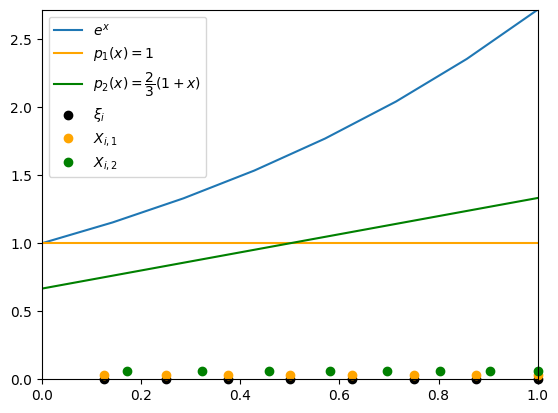

Correct integral value: 	 1.718281828459045 

Approximation using p(x) = 1: 	 1.827911206442992
Error using p(x) = 1: 		 0.10962937798394701
Approximation using p(x) = 2x: 	 1.7529386296449223
Error using p(x) = 2x: 		 0.03465680118587722


In [39]:
@np.vectorize
def f(x):
    return np.exp(x)

f_integral = np.e - 1

@np.vectorize
def p_1(x):
    return 1

@np.vectorize
def p_2(x):
    return 2/3 * (1+x)


N = 8

Xi_x = np.linspace(1, 0, N, endpoint=False)[::-1]
#Xi_x = [1/8, 2/8, 3/8, 4/8, 5/8, 6/8, 7/8, 8/8] # 
Xi_y = [0] * N

X_i_1_x = np.linspace(1, 0, N, endpoint=False)[::-1]
X_i_1_y = [0.03] * N

X_i_2_x = [-1 + np.sqrt(1+3*x) for x in Xi_x] # Inverse CDF of 2/3(1+x)
X_i_2_y = [0.06] * N

X = np.linspace(start = 0 , stop = 1, num = 1000)
Y = f(X)

plt.plot(X, Y, label="$e^x$")
plt.plot(X, p_1(X), label="$p_1(x) = 1$", color="orange")
plt.plot(X, p_2(X), label="$p_2(x) = \dfrac{2}{3}(1+x)$", color="green")

plt.scatter(Xi_x, Xi_y, clip_on=False, label="$\\xi_i$", marker=MarkerStyle("o", fillstyle="full"), color="black")
plt.scatter(X_i_1_x, X_i_1_y, clip_on=False, label="$X_{i,1}$", marker=MarkerStyle("o", fillstyle="full"), color="orange")
plt.scatter(X_i_2_x, X_i_2_y, clip_on=False, label="$X_{i,2}$", marker=MarkerStyle("o", fillstyle="full"), color="green")

plt.xlim([0, max(X)])
plt.ylim([0, max(Y)])
plt.legend(loc="upper left")
plt.show()

MC_1 = 1/N * np.sum(f(X_i_1_x) / p_1(X_i_1_x))
MC_1_error = np.abs(f_integral - MC_1)
MC_2 = 1/N * np.sum(f(X_i_2_x) / p_2(X_i_2_x))
MC_2_error = np.abs(f_integral - MC_2)
print("Correct integral value: \t", f_integral, "\n")
print("Approximation using p(x) = 1: \t", MC_1)
print("Error using p(x) = 1: \t\t", MC_1_error)
print("Approximation using p(x) = 2x: \t", MC_2)
print("Error using p(x) = 2x: \t\t", MC_2_error)

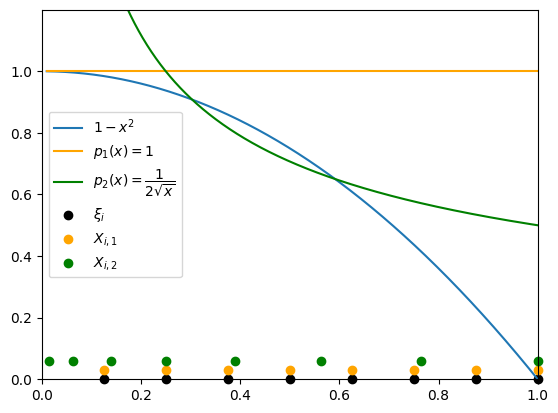

Correct integral value: 		 0.6666666666666666 

Approximation using p(x) = 1: 		 0.6015625
Error using p(x) = 1: 			 0.06510416666666663
Approximation using p(x) = 2x: 		 0.6536865234375
Error using p(x) = 1/(2*sqrt(x)): 	 0.01298014322916663


In [34]:
@np.vectorize
def f(x):
    return 1 - x**2

f_integral = 2/3

@np.vectorize
def p_1(x):
    return 1

@np.vectorize
def p_2(x):
    return 1 / (2 * np.sqrt(x))

N = 8

Xi_x = np.linspace(1, 0, N, endpoint=False)[::-1]
#Xi_x = [1/8, 2/8, 3/8, 4/8, 5/8, 6/8, 7/8, 8/8] # 
Xi_y = [0] * N

X_i_1_x = np.linspace(1, 0, N, endpoint=False)[::-1]
X_i_1_y = [0.03] * N

X_i_2_x = [x**2 for x in Xi_x] # Inverse CDF of 1/(2*sqrt(x))
X_i_2_y = [0.06] * N

X = np.linspace(start = 0.01 , stop = 1, num = 1000)
Y = f(X)

plt.plot(X, Y, label="$1 - x^2$")
plt.plot(X, p_1(X), label="$p_1(x) = 1$", color="orange")
plt.plot(X, p_2(X), label="$p_2(x) = \dfrac{1}{2\sqrt{x}}$", color="green")

plt.scatter(Xi_x, Xi_y, clip_on=False, label="$\\xi_i$", marker=MarkerStyle("o", fillstyle="full"), color="black")
plt.scatter(X_i_1_x, X_i_1_y, clip_on=False, label="$X_{i,1}$", marker=MarkerStyle("o", fillstyle="full"), color="orange")
plt.scatter(X_i_2_x, X_i_2_y, clip_on=False, label="$X_{i,2}$", marker=MarkerStyle("o", fillstyle="full"), color="green")

plt.xlim([0, max(X)])
plt.ylim([0, max(Y) + 0.2])
plt.legend(loc="center left")
plt.show()

MC_1 = 1/N * np.sum(f(X_i_1_x) / p_1(X_i_1_x))
MC_1_error = np.abs(f_integral - MC_1)
MC_2 = 1/N * np.sum(f(X_i_2_x) / p_2(X_i_2_x))
MC_2_error = np.abs(f_integral - MC_2)
print("Correct integral value: \t\t", f_integral, "\n")
print("Approximation using p(x) = 1: \t\t", MC_1)
print("Error using p(x) = 1: \t\t\t", MC_1_error)
print("Approximation using p(x) = 2x: \t\t", MC_2)
print("Error using p(x) = 1/(2*sqrt(x)): \t", MC_2_error)